In [1]:
import pandas as pd
import torch
import numpy as np
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import random
import codecs
from config import *
import os

In [2]:
file = os.path.join(DATA_DIR,ALL_DATA_FILE)
df = pd.DataFrame.from_csv(file, sep='\t', header=0)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  


In [3]:
df.head()

,tweet,subtask_a,subtask_b,subtask_c
id,,,,
86426,@USER She should ask a few native Americans wh...,OFF,UNT,NaN
90194,@USER @USER Go home you’re drunk!!! @USER #MAG...,OFF,TIN,IND
16820,Amazon is investigating Chinese employees who ...,NOT,NaN,NaN
62688,"@USER Someone should'veTaken"" this piece of sh...",OFF,UNT,NaN
43605,@USER @USER Obama wanted liberals &amp; illega...,NOT,NaN,NaN


### Data Analysis

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

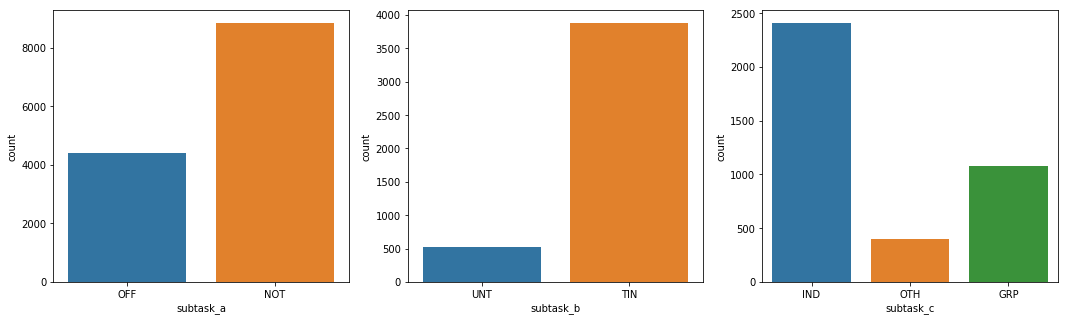

In [6]:
fig, axs = plt.subplots(figsize=(18, 5), ncols=3)

sns.countplot(x='subtask_a', data=df, ax=axs[0])
sns.countplot(x='subtask_b', data=df, ax=axs[1])
sns.countplot(x='subtask_c', data=df, ax=axs[2])

In [9]:
print("Missing values in Subtask A: {}/{}".format(df.subtask_a.isnull().sum(), df.subtask_a.shape[0]))
print("Missing values in Subtask B: {}/{}".format(df.subtask_b.isnull().sum(), df.subtask_b.shape[0]))
print("Missing values in Subtask C: {}/{}".format(df.subtask_c.isnull().sum(), df.subtask_c.shape[0]))

Missing values in Subtask A: 0/13240
Missing values in Subtask B: 8840/13240
Missing values in Subtask C: 9364/13240


In [12]:
print("offsive ", df.subtask_b.shape[0] - df.subtask_b.isnull().sum())
print("target ", df.subtask_c.shape[0] - df.subtask_c.isnull().sum())

offsive  4400
target  3876
